Importing Necessary Libraries:


In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Reading CSV into Dataframe

In [3]:
df=pd.read_csv('E:/Projects ML/technohacks data analysis/Task3/archive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Pivot_table

In [13]:
pivot_table = df.pivot_table(index='Species', aggfunc='mean')
print(pivot_table)

                    Id  PetalLengthCm  PetalWidthCm  SepalLengthCm  \
Species                                                              
Iris-setosa       25.5          1.464         0.244          5.006   
Iris-versicolor   75.5          4.260         1.326          5.936   
Iris-virginica   125.5          5.552         2.026          6.588   

                 SepalWidthCm  
Species                        
Iris-setosa             3.418  
Iris-versicolor         2.770  
Iris-virginica          2.974  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Exploratory Data Analysis

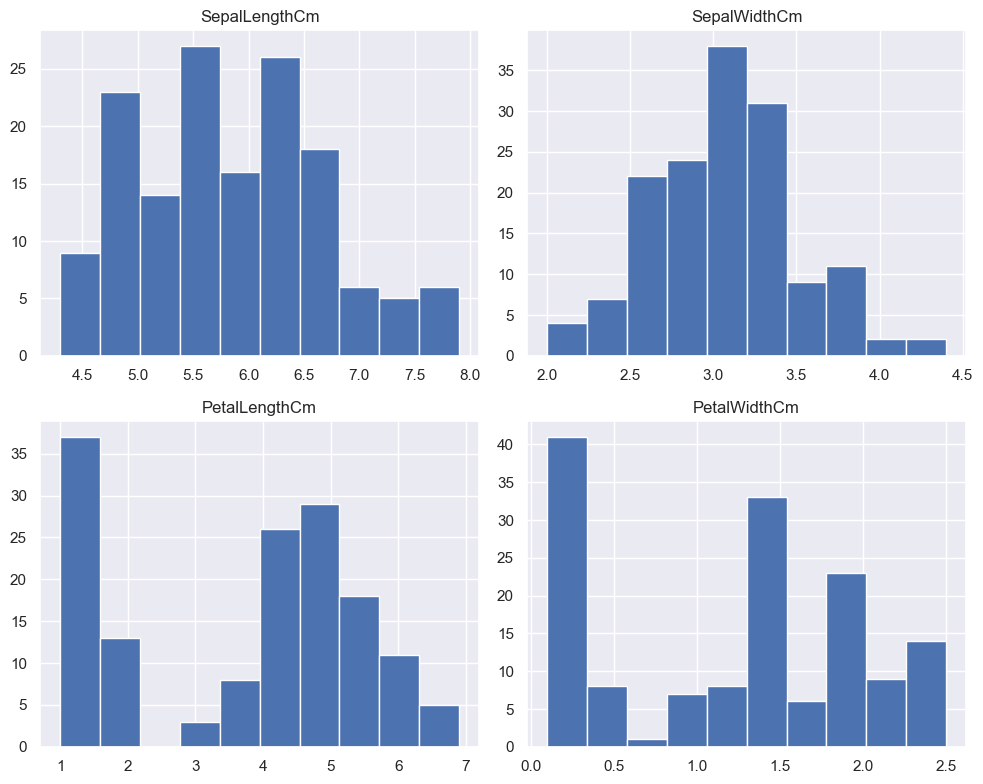

In [29]:
col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
    'Species']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Iterate through features and plot histograms
for i, feature in enumerate(col[:-1]):  # Exclude 'Species' from features
    df[feature].hist(ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

Adding a column with our target col

In [32]:
df['target']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [35]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Relationship of the data features with the target

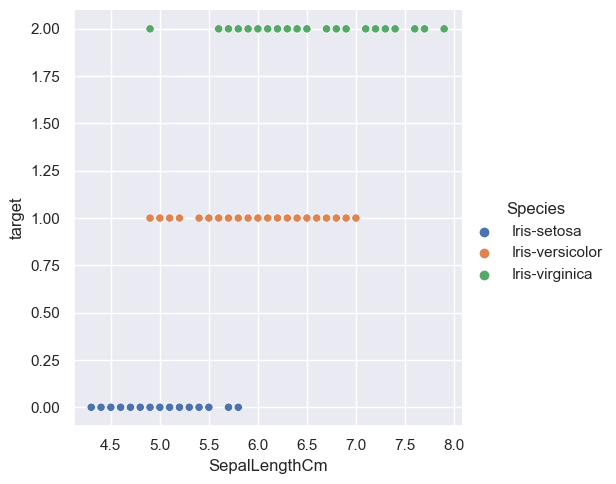

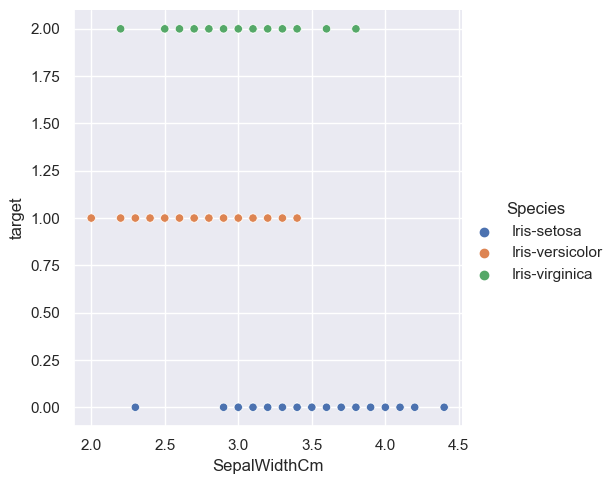

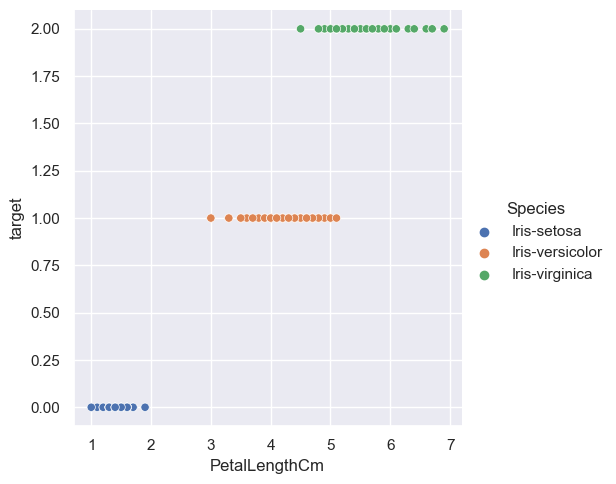

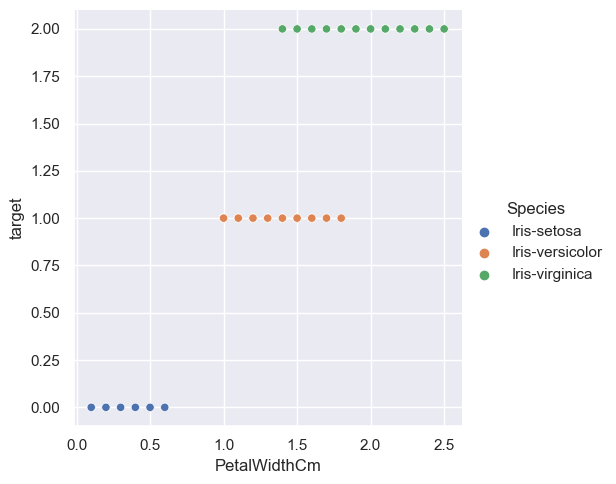

In [42]:
col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

# Iterate through features and plot histograms
for i, feature in enumerate(col[:-1]):  # Exclude 'Species' from features
    sns.relplot(x=feature,y='target',hue='Species',data=df)

EDA pairplots

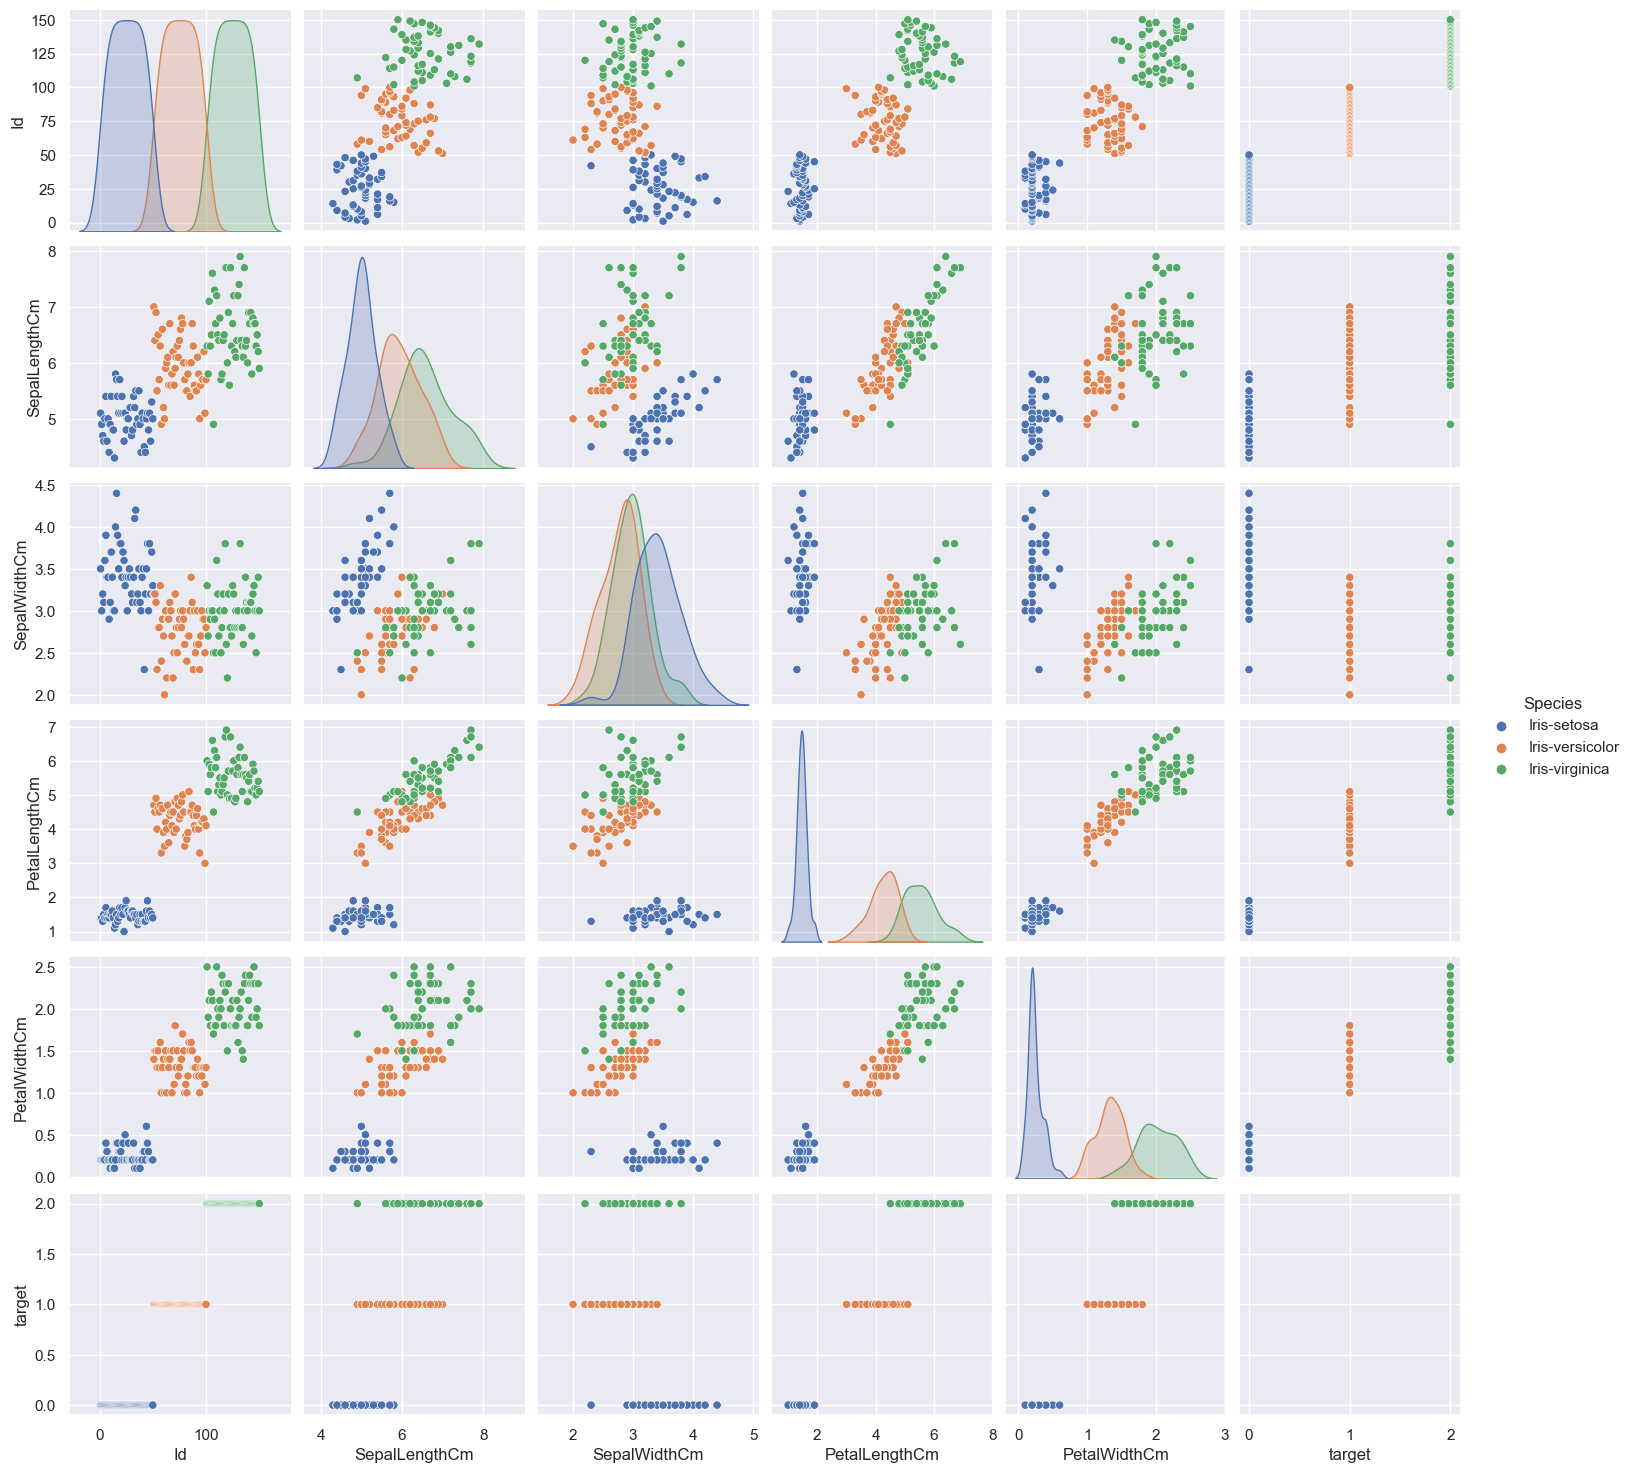

In [48]:
sns.pairplot(df,hue='Species')

dropping the id column

In [54]:
df.drop(columns=['Id'],inplace=True)

Train test split

In [55]:
from sklearn.model_selection import train_test_split
df_train,df_test =train_test_split(df,test_size=0.25)
print(df_train.shape)
print(df_test.shape)

(112, 6)
(38, 6)


In [56]:
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
103,6.3,2.9,5.6,1.8,Iris-virginica,2
120,6.9,3.2,5.7,2.3,Iris-virginica,2
137,6.4,3.1,5.5,1.8,Iris-virginica,2
96,5.7,2.9,4.2,1.3,Iris-versicolor,1
34,4.9,3.1,1.5,0.1,Iris-setosa,0


prepare our data for modeling

In [62]:
X_train= df_train.drop(columns=['Species','target']).values
y_train=df_train['target'].values

modeling -what is our baselin?

Modeling - Simple Manual Model

In [63]:
def single_feature_prediction(PetalLengthCm):
    if PetalLengthCm <2.5:
        return 0
    elif PetalLengthCm <4.8:
        return 1
    else:
        return 2

In [64]:
df_train['PetalLengthCm'].values

array([5.6, 5.7, 5.5, 4.2, 1.5, 1.4, 4.3, 5.1, 5. , 6. , 1.6, 4.5, 1.5,
       5.1, 1.5, 1.4, 5.6, 1.3, 1.7, 5.9, 6.7, 5.3, 6. , 3.9, 4.9, 5.7,
       3.5, 1. , 1.3, 4.2, 1.3, 3.8, 4.2, 4.5, 6.1, 4.1, 1.5, 1.5, 3. ,
       4.5, 5.5, 4.8, 1.6, 5.1, 1.6, 5.7, 4.1, 5.4, 4.8, 1.7, 4.7, 1.3,
       1.5, 1.9, 1.9, 1.4, 4.6, 6.6, 4.7, 4. , 4.2, 1.4, 5.9, 4.9, 6.1,
       4.7, 4. , 3.3, 1.5, 1.3, 1.4, 3.6, 5.5, 5.6, 5.1, 4.8, 4.6, 5.6,
       4.4, 1.5, 3.7, 4.9, 5.8, 1.1, 5.2, 4.5, 4.5, 3.9, 4. , 1.2, 5.8,
       4.5, 4. , 6.9, 4.9, 3.9, 4.5, 5.3, 4.4, 1.5, 1.4, 1.4, 3.5, 1.4,
       1.5, 5.4, 1.4, 4.9, 1.4, 1.5, 5.8, 5.1])

In [65]:
X_train[:,2]

array([5.6, 5.7, 5.5, 4.2, 1.5, 1.4, 4.3, 5.1, 5. , 6. , 1.6, 4.5, 1.5,
       5.1, 1.5, 1.4, 5.6, 1.3, 1.7, 5.9, 6.7, 5.3, 6. , 3.9, 4.9, 5.7,
       3.5, 1. , 1.3, 4.2, 1.3, 3.8, 4.2, 4.5, 6.1, 4.1, 1.5, 1.5, 3. ,
       4.5, 5.5, 4.8, 1.6, 5.1, 1.6, 5.7, 4.1, 5.4, 4.8, 1.7, 4.7, 1.3,
       1.5, 1.9, 1.9, 1.4, 4.6, 6.6, 4.7, 4. , 4.2, 1.4, 5.9, 4.9, 6.1,
       4.7, 4. , 3.3, 1.5, 1.3, 1.4, 3.6, 5.5, 5.6, 5.1, 4.8, 4.6, 5.6,
       4.4, 1.5, 3.7, 4.9, 5.8, 1.1, 5.2, 4.5, 4.5, 3.9, 4. , 1.2, 5.8,
       4.5, 4. , 6.9, 4.9, 3.9, 4.5, 5.3, 4.4, 1.5, 1.4, 1.4, 3.5, 1.4,
       1.5, 5.4, 1.4, 4.9, 1.4, 1.5, 5.8, 5.1])

In [68]:
manual_predication=np.array([single_feature_prediction(val) for val in X_train[:,2]])

In [75]:
manual_model_accuracy=np.mean(manual_predication==y_train)*100
print(f'Manual Model Accuracy:{manual_model_accuracy}')

Manual Model Accuracy:96.42857142857143


Applying logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [79]:
Xt,Xv,yt,yv = train_test_split(X_train,y_train,test_size=0.25)

In [80]:
print(Xt.shape)
print(Xv.shape)

(84, 4)
(28, 4)


In [81]:
model.fit(Xt,yt)

LogisticRegression()

using a validation set to test our model

In [85]:
y_pred=model.predict(Xv)

In [86]:
np.mean(y_pred==yv)

0.9642857142857143

using cross validation to evaluate our model

In [87]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [88]:
model= LogisticRegression(max_iter=200)

In [93]:
accuracy=cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
accuracy.mean()*100

98.18181818181819

In [98]:
y_pred_pre = cross_val_predict(model,X_train,y_train,cv=5)
predicted_correctly_mask=y_pred_pre==y_train
not_predicted_correctly = ~ predicted_correctly_mask
np.mean(y_pred_pre==y_train)*100

98.21428571428571

In [99]:
df_predictions = df_train.copy()

In [101]:
df_predictions['correct_prediction']=predicted_correctly_mask
df_predictions['prediction'] =y_pred_pre
df_predictions['prediction_label']=df_predictions['prediction'].map({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})
df_predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target,correct_prediction,prediction,prediction_label
103,6.3,2.9,5.6,1.8,Iris-virginica,2,True,2,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica,2,True,2,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica,2,True,2,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor,1,True,1,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa,0,True,0,Iris-setosa


In [107]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='Species', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    
    axs[3].set_visible(False)

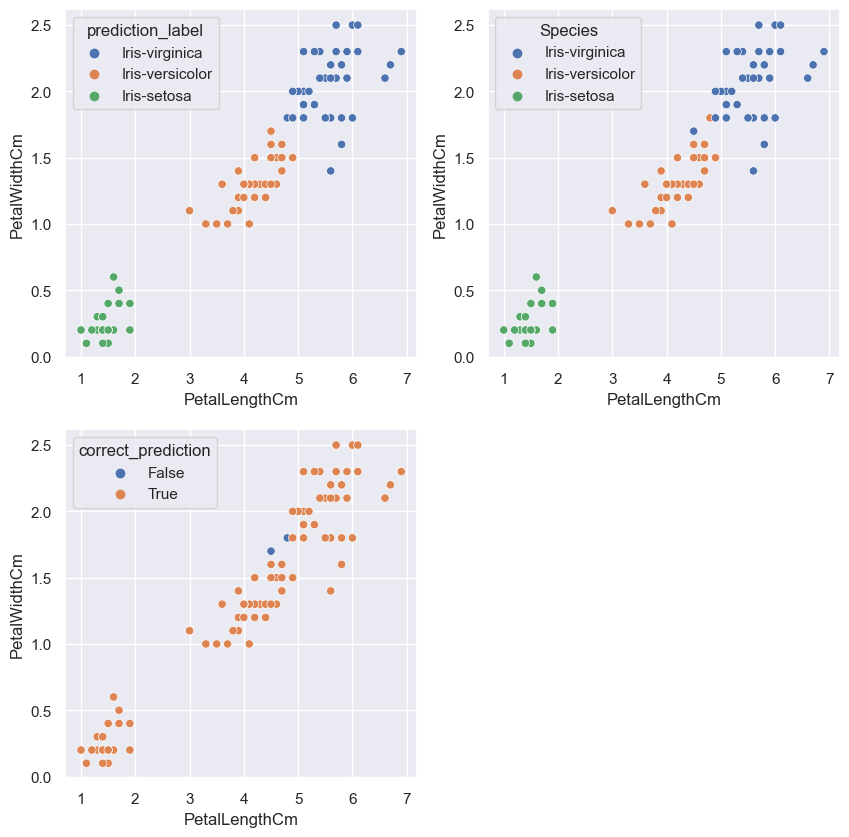

In [108]:
plot_incorrect_predictions(df_predictions,'PetalLengthCm','PetalWidthCm')

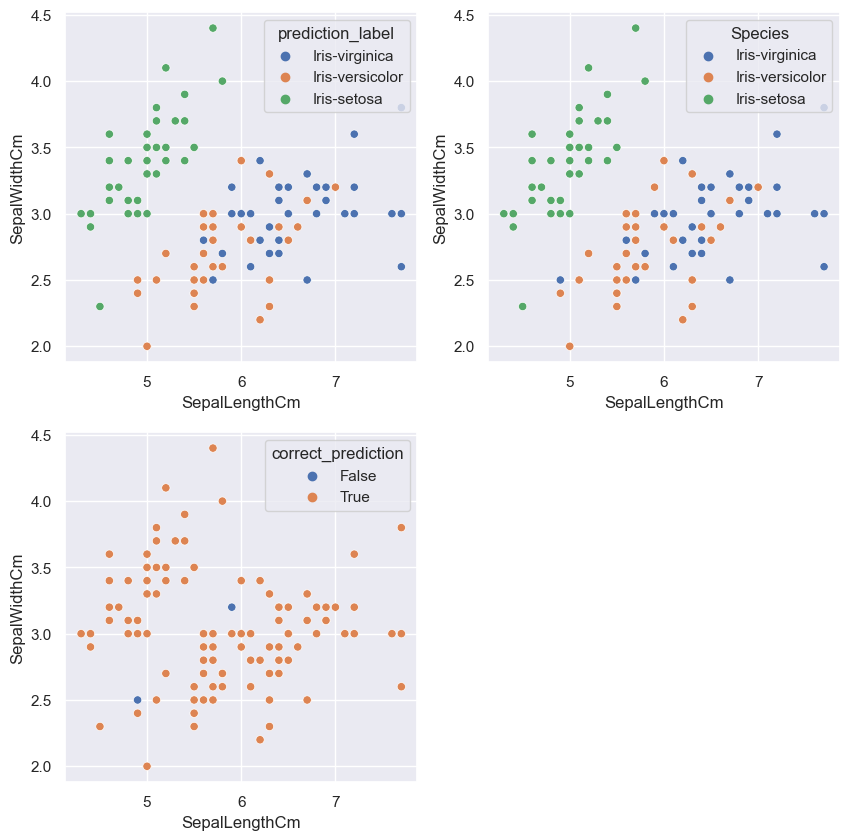

In [109]:
plot_incorrect_predictions(df_predictions,'SepalLengthCm', 'SepalWidthCm')

final Logistic regression Model After Model Tunning

spliting test data into x,y

In [118]:
X_test= df_test.drop(columns=['Species','target']).values
y_test=df_test['target'].values

In [117]:
model =LogisticRegression(max_iter=200,C=2)

fitting the model

In [119]:
model.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=200)

In [130]:
y_test_pred= model.predict(X_test)
test_set_correctly_classified =y_test_pred==y_test
test_set_incorrectly_classified=~test_set_correctly_classified
accuracy=np.mean(test_set_correctly_classified)*100

In [129]:
print(f"test set accuracy:{accuracy}")

test set accuracy:94.73684210526315


In [131]:

df_prediction_test= df_test.copy()
df_prediction_test['correct_prediction']=test_set_correctly_classified
df_prediction_test['prediction'] =y_test_pred
df_prediction_test['prediction_label']=df_prediction_test['prediction'].map({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})
df_prediction_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target,correct_prediction,prediction,prediction_label
93,5.0,2.3,3.3,1.0,Iris-versicolor,1,True,1,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica,2,True,2,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa,0,True,0,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa,0,True,0,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa,0,True,0,Iris-setosa


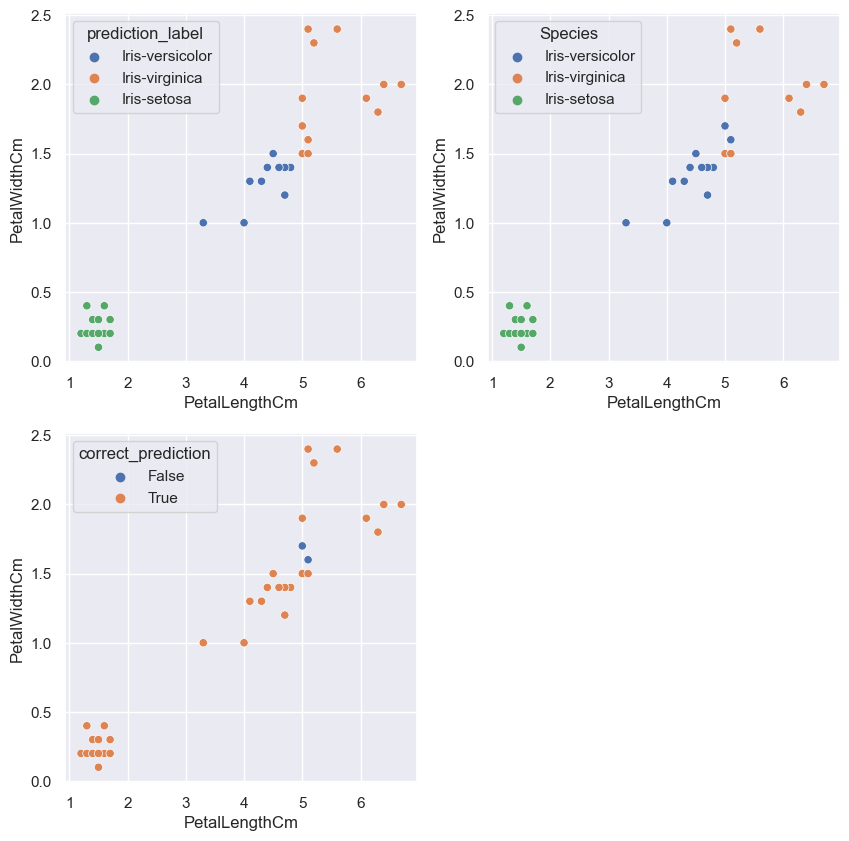

In [132]:
plot_incorrect_predictions(df_prediction_test,'PetalLengthCm','PetalWidthCm')

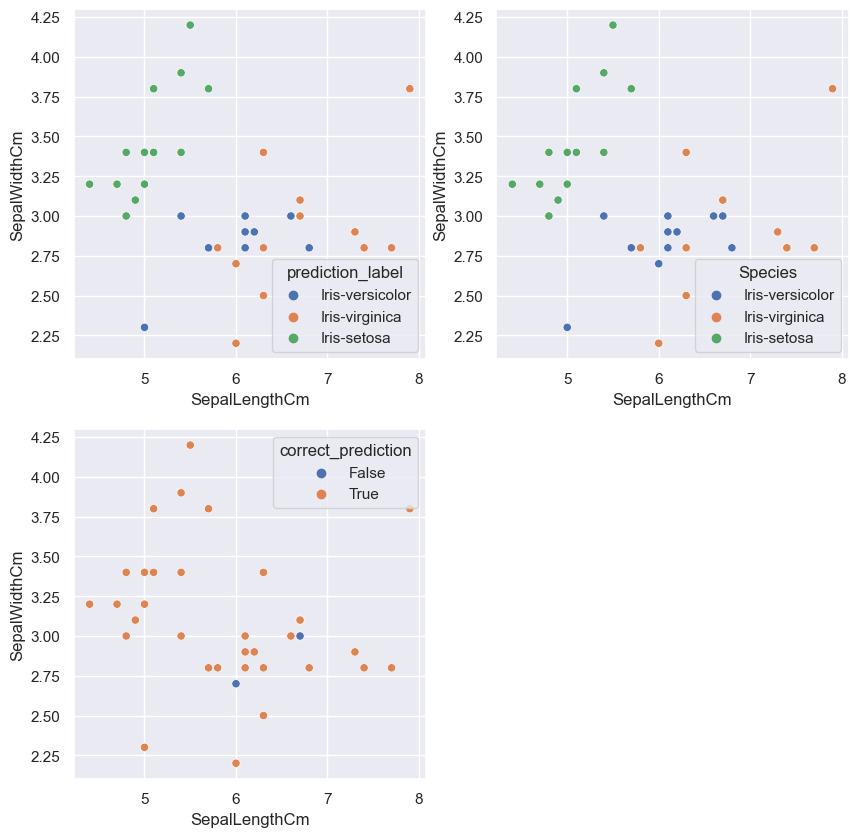

In [133]:
plot_incorrect_predictions(df_prediction_test,'SepalLengthCm', 'SepalWidthCm')

Appying RandomForestClassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [126]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
accs = cross_val_score(RFC,X_train,y_train,cv=5,scoring='accuracy')

In [115]:
np.mean(accs)*100

97.27272727272727

In [127]:
predict = RFC.predict(X_test)
test =y_test_pred==y_test
Acc=np.mean(test)*100
print(f"test set accuracy on RandomForestClassifier:{Acc}")

test set accuracy on RandomForestClassifier:94.73684210526315


K-Nearest Neighbors (KNN)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [135]:
knn = KNeighborsClassifier(n_neighbors=3)

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [142]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy: {accuracy}%')

Accuracy: 92.11%


K-Means Clustering

In [159]:
from sklearn.cluster import KMeans
import random

In [160]:
K_mean_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
target=df['target'].values
random.shuffle(K_mean_data)

In [167]:
# Initialize the KMeans model with, for example, 3 clusters (since there are 3 species in Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to your data
kmeans.fit(X_train)

# Get the cluster centroids and labels for each data point
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centroids:")
print(centroids)

print("\nLabels for each data point:")
print(labels)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

e:\anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\anaconda python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centroids:
[[4.98333333 3.39166667 1.45277778 0.24444444]
 [5.81777778 2.74222222 4.32444444 1.42888889]
 [6.79354839 3.07096774 5.67741935 2.0516129 ]]

Labels for each data point:
[2 2 2 1 0 0 1 2 1 2 0 1 0 1 0 0 2 0 0 2 2 2 2 1 2 2 1 0 0 1 0 1 1 1 2 1 0
 0 1 1 2 1 0 1 0 2 1 2 1 0 2 0 0 0 0 0 1 2 1 1 1 0 2 1 2 1 1 1 0 0 0 1 2 2
 2 1 1 2 1 0 1 1 2 0 2 1 1 1 1 0 2 1 1 2 1 1 1 2 1 0 0 0 1 0 0 2 0 1 0 0 2
 1]
Inertia: 57.14141577060932


Mean of Labels Matching

In [172]:
print(f"Mean of Labels Matching :{round(np.mean(labels==y_train)*100,2)}%")

Mean of Labels Matching :89.29%
